# Two layer map, spatial join, & buffer for speed limits
Data from [LA City Geohub](https://geohub.lacity.org/datasets/73cac85a26ee4d44ac1b565b12c76d34/explore)

*Notebook Author: Ellie Gertler*


In [131]:
#step 1: import libraries

# for data wrangling
import pandas as pd

# for spatial
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for basemaps
import contextily as ctx

# for interactive plots
import plotly.express as px


In [132]:
#import 80 locations csv to dataframe
df = pd.read_csv('Data/Locations_Master.csv')

In [133]:
#step 2: data clean up

In [134]:
df

,ID,point_x,point_y,match_addr
0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA"
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA"
2,30937,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA"
3,218461,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA"
4,216930,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA"
...,...,...,...,...
77,206521,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA"
78,108953,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA"
79,179031,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA"
80,136194,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA"


In [135]:
# rename columns
df.columns = ['ID',
              'Longitude',
              'Latitude',
              'Location']
df

,ID,Longitude,Latitude,Location
0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA"
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA"
2,30937,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA"
3,218461,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA"
4,216930,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA"
...,...,...,...,...
77,206521,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA"
78,108953,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA"
79,179031,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA"
80,136194,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA"


In [136]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf_locations = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf_locations

,ID,Longitude,Latitude,Location,geometry
0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",POINT (-118.27032 34.06666)
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",POINT (-118.26521 33.92548)
2,30937,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",POINT (-118.33348 34.07616)
3,218461,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",POINT (-118.25608 34.01604)
4,216930,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",POINT (-118.25652 33.95390)
...,...,...,...,...,...
77,206521,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",POINT (-118.30902 33.96726)
78,108953,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",POINT (-118.30902 33.96621)
79,179031,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",POINT (-118.36251 34.06303)
80,136194,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",POINT (-118.57142 34.17699)


In [137]:
# convert gdf to web mercator
gdf_locations = gdf_locations.to_crs(epsg=3857)

In [138]:
#Step 3: add speed limit data 

In [139]:
#import csv to dataframe
df_speed = pd.read_csv('Data/speed_limits.csv')

In [140]:
df_speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8263 entries, 0 to 8262
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      8263 non-null   int64  
 1   X       8263 non-null   float64
 2   Y       8263 non-null   float64
 3   Speed   8263 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 258.3 KB


In [141]:
# rename columns
df_speed.columns = ['ID',
              'Longitude',
              'Latitude',
              'Speed'] 
df_speed

,ID,Longitude,Latitude,Speed
0,25433,-118.501008,34.213901,35
1,25437,-118.502530,34.221963,35
2,25445,-118.501403,34.200019,35
3,25448,-118.502594,34.246282,35
4,25454,-118.502192,34.258554,35
...,...,...,...,...
8258,186461,-118.501091,34.160717,35
8259,186462,-118.501097,34.164968,35
8260,186463,-118.501097,34.164968,35
8261,186506,-118.553546,34.210186,35


In [142]:
# convert speed df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf_speed = gpd.GeoDataFrame(df_speed, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df_speed.Longitude, df_speed.Latitude))
gdf_speed

,ID,Longitude,Latitude,Speed,geometry
0,25433,-118.501008,34.213901,35,POINT (-118.50101 34.21390)
1,25437,-118.502530,34.221963,35,POINT (-118.50253 34.22196)
2,25445,-118.501403,34.200019,35,POINT (-118.50140 34.20002)
3,25448,-118.502594,34.246282,35,POINT (-118.50259 34.24628)
4,25454,-118.502192,34.258554,35,POINT (-118.50219 34.25855)
...,...,...,...,...,...
8258,186461,-118.501091,34.160717,35,POINT (-118.50109 34.16072)
8259,186462,-118.501097,34.164968,35,POINT (-118.50110 34.16497)
8260,186463,-118.501097,34.164968,35,POINT (-118.50110 34.16497)
8261,186506,-118.553546,34.210186,35,POINT (-118.55355 34.21019)


In [143]:
# reproject to web mercator
gdf_speed = gdf_speed.to_crs(epsg=3857)

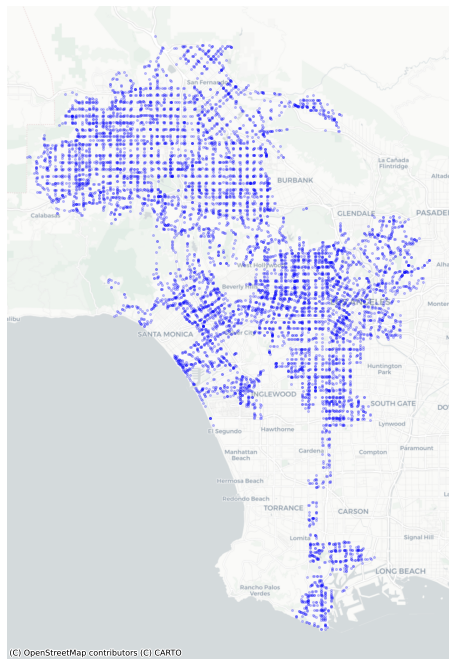

In [144]:
# map speed limits to see all speed limit signs within LA city
fig, ax = plt.subplots(figsize=(12,12))

gdf_speed.plot(ax=ax,
         color='blue', 
         markersize=5,
         alpha=0.25)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [145]:
gdf_speed.Speed.unique() # to find all the speed limits signs 

array([35, 25, 30, 45, 40, 50, 15])

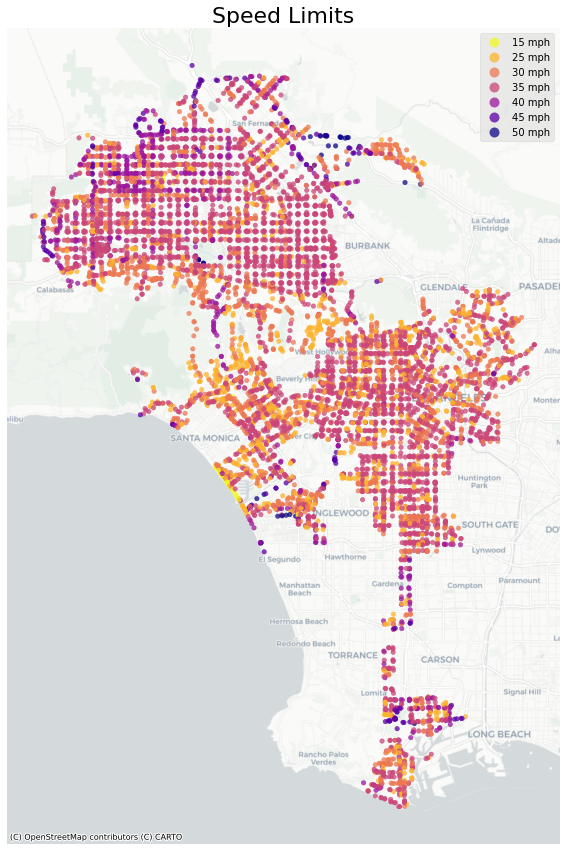

In [146]:
# plotting choropleth map of speed limits distributed across LA
fig,ax = plt.subplots(figsize=(15,15))

gdf_speed.plot(ax=ax,
        column='Speed',
        legend=True,
        alpha=.75,
        markersize=20,
        cmap='plasma_r',
        scheme='user_defined',
        classification_kwds={'bins':[15,25,30,35,40,45,50]})

ax.axis('off')
leg = ax.get_legend()
leg.get_texts()[0].set_text('15 mph')
leg.get_texts()[1].set_text('25 mph')
leg.get_texts()[2].set_text('30 mph')
leg.get_texts()[3].set_text('35 mph')
leg.get_texts()[4].set_text('40 mph')
leg.get_texts()[5].set_text('45 mph')
leg.get_texts()[6].set_text('50 mph')
ax.set_title('Speed Limits',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [147]:
#step 4: create buffer zone around 80 locations

In [148]:
# making a copy of my 80 collision locations df
gdf_buffer = gdf_locations.copy()

In [149]:
# adding the buffer of 400 meters (.25 miles) around each location
gdf_buffer['geometry']=gdf_buffer['geometry'].buffer(400)

<AxesSubplot:>

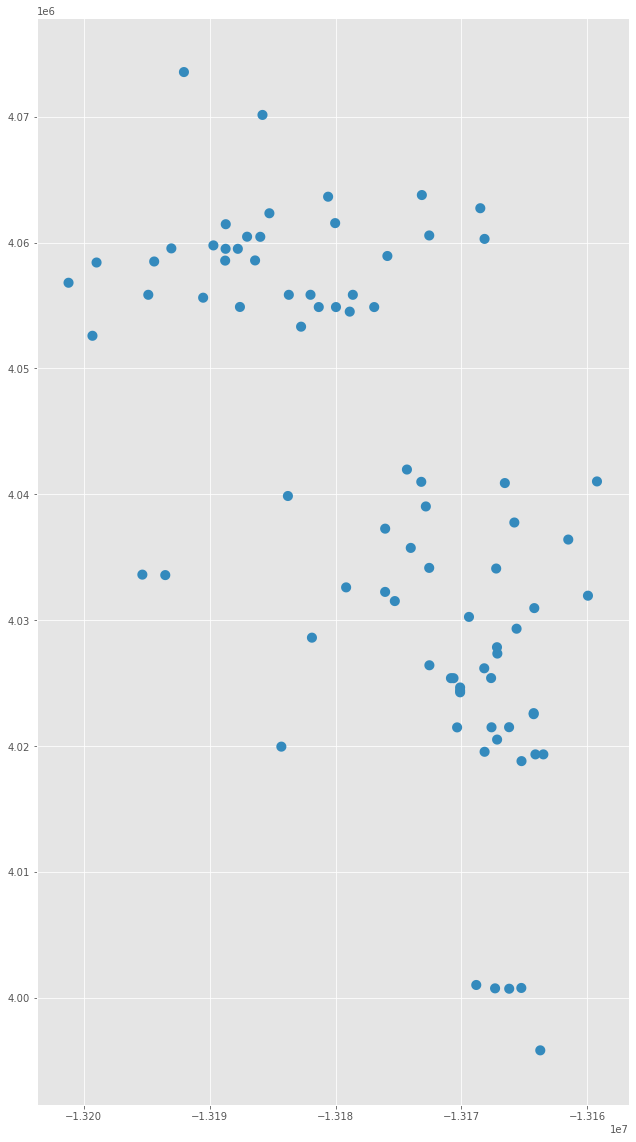

In [150]:
#plotting the buffer
gdf_buffer.plot(figsize=(20,20))

In [151]:
#Step 5: make a two layer map of buffer zones and speed limits just to see what it looks like 

In [152]:
# first I'm going to get the bounding box coordinates for the location data
minx, miny, maxx, maxy = gdf_buffer.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-13201610.576778045
-13158826.419693412
3995421.154989851
4073944.802768655


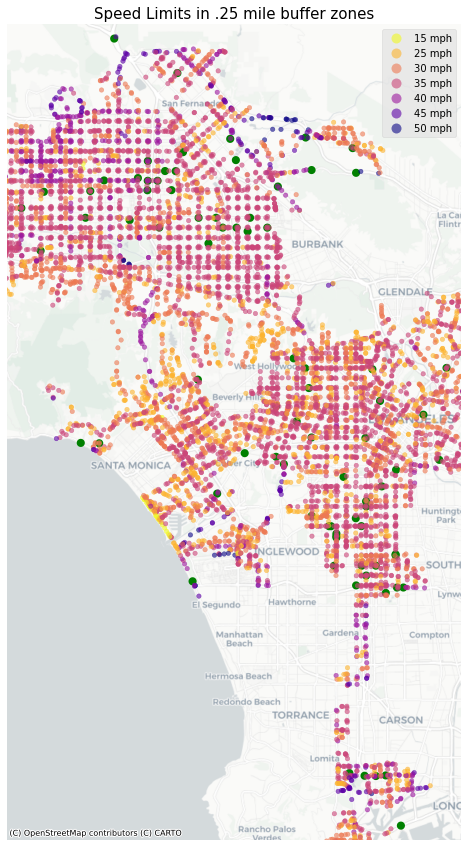

In [153]:
#two layer map with buffers and speed limits just to see
# now I'm going to set up a map with both data layers

# set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(15, 15))

# .24 mile buffer zones
gdf_buffer.plot(ax=ax, # this puts it in the ax plot
        color='green', 
        markersize=20,
        alpha=1)

#speed limits
gdf_speed.plot(ax=ax,
        column='Speed',
        legend=True,
        alpha=.6,
        markersize=20,
        cmap='plasma_r',
        scheme='user_defined',
        classification_kwds={'bins':[15,25,30,35,40,45,50]})

ax.axis('off')
leg = ax.get_legend()
leg.get_texts()[0].set_text('15 mph')
leg.get_texts()[1].set_text('25 mph')
leg.get_texts()[2].set_text('30 mph')
leg.get_texts()[3].set_text('35 mph')
leg.get_texts()[4].set_text('40 mph')
leg.get_texts()[5].set_text('45 mph')
leg.get_texts()[6].set_text('50 mph')
ax.set_title('Speed Limits in .25 mile buffer zones',fontsize=15)

# use the bounding box coordinates to set the x and y limits
ax.set_xlim(minx - 1000, maxx + 1000) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - 1000, maxy + 1000)


# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [154]:
#step 6: spatial join speed limits to 80 locations with buffer

In [155]:
# joining buffer data onto light data 
join = gpd.sjoin(gdf_buffer, gdf_speed, how='left')
join.head()

,ID_left,Longitude_left,Latitude_left,Location,geometry,index_right,ID_right,Longitude_right,Latitude_right,Speed
0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA","POLYGON ((-13165392.221 4037756.597, -13165394...",2059.0,71093.0,-118.270773,34.067015,35.0
0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA","POLYGON ((-13165392.221 4037756.597, -13165394...",459.0,39207.0,-118.269879,34.067114,35.0
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA","POLYGON ((-13164823.011 4018800.180, -13164824...",2182.0,73817.0,-118.265055,33.923449,35.0
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA","POLYGON ((-13164823.011 4018800.180, -13164824...",6612.0,153702.0,-118.264337,33.923654,30.0
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA","POLYGON ((-13164823.011 4018800.180, -13164824...",5567.0,136045.0,-118.264555,33.923792,30.0


In [156]:
#resetting index to basically do a pivot table to present the data how I want it
join.reset_index()

,index,ID_left,Longitude_left,Latitude_left,Location,geometry,index_right,ID_right,Longitude_right,Latitude_right,Speed
0,0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA","POLYGON ((-13165392.221 4037756.597, -13165394...",2059.0,71093.0,-118.270773,34.067015,35.0
1,0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA","POLYGON ((-13165392.221 4037756.597, -13165394...",459.0,39207.0,-118.269879,34.067114,35.0
2,1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA","POLYGON ((-13164823.011 4018800.180, -13164824...",2182.0,73817.0,-118.265055,33.923449,35.0
3,1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA","POLYGON ((-13164823.011 4018800.180, -13164824...",6612.0,153702.0,-118.264337,33.923654,30.0
4,1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA","POLYGON ((-13164823.011 4018800.180, -13164824...",5567.0,136045.0,-118.264555,33.923792,30.0
...,...,...,...,...,...,...,...,...,...,...,...
295,80,136194,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA","POLYGON ((-13198910.297 4052592.359, -13198912...",7708.0,173188.0,-118.571080,34.175293,35.0
296,80,136194,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA","POLYGON ((-13198910.297 4052592.359, -13198912...",4863.0,123329.0,-118.570905,34.176388,35.0
297,81,154179,-118.485111,34.230339,"WOODLEY AVE & RAYEN ST, LOS ANGELES, CA","POLYGON ((-13189302.167 4059773.026, -13189304...",6436.0,150790.0,-118.485289,34.227831,35.0
298,81,154179,-118.485111,34.230339,"WOODLEY AVE & RAYEN ST, LOS ANGELES, CA","POLYGON ((-13189302.167 4059773.026, -13189304...",4676.0,120136.0,-118.484985,34.229958,35.0


In [157]:
# adding blank columns of each speed limit category to assign data to 
join['25 mph']=0
join['30 mph']=0
join['35 mph']=0
join['40 mph']=0
join['45 mph']=0
join.head()

,ID_left,Longitude_left,Latitude_left,Location,geometry,index_right,ID_right,Longitude_right,Latitude_right,Speed,25 mph,30 mph,35 mph,40 mph,45 mph
0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA","POLYGON ((-13165392.221 4037756.597, -13165394...",2059.0,71093.0,-118.270773,34.067015,35.0,0,0,0,0,0
0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA","POLYGON ((-13165392.221 4037756.597, -13165394...",459.0,39207.0,-118.269879,34.067114,35.0,0,0,0,0,0
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA","POLYGON ((-13164823.011 4018800.180, -13164824...",2182.0,73817.0,-118.265055,33.923449,35.0,0,0,0,0,0
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA","POLYGON ((-13164823.011 4018800.180, -13164824...",6612.0,153702.0,-118.264337,33.923654,30.0,0,0,0,0,0
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA","POLYGON ((-13164823.011 4018800.180, -13164824...",5567.0,136045.0,-118.264555,33.923792,30.0,0,0,0,0,0


In [158]:
#loop to assign data back to the new columns created above 
for index, row in join.iterrows():
#     print(row.Speed) 
    if row.Speed == 25.0: 
        join.at[index,'25 mph']=1
    elif row.Speed == 30.0: 
        join.at[index,'30 mph']=1
    elif row.Speed == 35.0: 
        join.at[index,'35 mph']=1
    elif row.Speed == 40.0: 
        join.at[index,'40 mph']=1
    elif row.Speed == 45.0: 
        join.at[index,'45 mph']=1

In [159]:
# checking to see if the loop worked
join.head()

,ID_left,Longitude_left,Latitude_left,Location,geometry,index_right,ID_right,Longitude_right,Latitude_right,Speed,25 mph,30 mph,35 mph,40 mph,45 mph
0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA","POLYGON ((-13165392.221 4037756.597, -13165394...",2059.0,71093.0,-118.270773,34.067015,35.0,0,0,1,0,0
0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA","POLYGON ((-13165392.221 4037756.597, -13165394...",459.0,39207.0,-118.269879,34.067114,35.0,0,0,1,0,0
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA","POLYGON ((-13164823.011 4018800.180, -13164824...",2182.0,73817.0,-118.265055,33.923449,35.0,0,1,1,0,0
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA","POLYGON ((-13164823.011 4018800.180, -13164824...",6612.0,153702.0,-118.264337,33.923654,30.0,0,1,1,0,0
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA","POLYGON ((-13164823.011 4018800.180, -13164824...",5567.0,136045.0,-118.264555,33.923792,30.0,0,1,1,0,0


In [160]:
# now creating new dataframe that assigns speed limits to their columns by each location and sums up the occurences of each speed category 
join_speed = join.groupby(['Location']).agg({'25 mph':'sum','30 mph':'sum','35 mph':'sum','40 mph':'sum','45 mph':'sum'}).reset_index()
join_speed

,Location,25 mph,30 mph,35 mph,40 mph,45 mph
0,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",0,0,2,0,0
1,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",0,5,5,0,0
2,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",3,0,3,0,0
3,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",0,0,0,0,0
4,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",0,1,0,0,0
...,...,...,...,...,...,...
77,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",0,0,6,0,0
78,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",0,7,7,0,0
79,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",13,13,13,0,0
80,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",0,0,2,0,0


In [161]:
# Step 6: merge new dataframe to original dataframe to get geometry column back
gdf_buffer=gdf_locations.merge(join_speed,on='Location')
gdf_buffer.head(3)

,ID,Longitude,Latitude,Location,geometry,25 mph,30 mph,35 mph,40 mph,45 mph
0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",POINT (-13165792.221 4037756.597),0,0,2,0,0
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",POINT (-13165223.011 4018800.180),0,5,5,0,0
2,30937,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",POINT (-13172822.982 4039032.589),3,0,3,0,0


In [173]:
#to see entire dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)

gdf_buffer

,ID,Longitude,Latitude,Location,geometry,25 mph,30 mph,35 mph,40 mph,45 mph
0,211128,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",POINT (-13165792.221 4037756.597),0,0,2,0,0
1,163711,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",POINT (-13165223.011 4018800.180),0,5,5,0,0
2,30937,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",POINT (-13172822.982 4039032.589),3,0,3,0,0
3,218461,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",POINT (-13164206.954 4030956.630),0,0,0,0,0
4,216930,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",POINT (-13164255.523 4022613.006),0,1,0,0,0
5,205044,-118.256532,33.953266,"CENTRAL AVE & 92ND ST, LOS ANGELES, CA",POINT (-13164256.947 4022528.535),0,2,2,0,0
6,210379,-118.286620,33.945503,"CENTURY BLVD & HOOVER ST, LOS ANGELES, CA",POINT (-13167606.295 4021486.787),0,0,4,0,0
7,184324,-118.274077,33.945564,"CENTURY BLVD & MAIN ST, LOS ANGELES, CA",POINT (-13166209.970 4021494.978),0,4,4,0,0
8,221122,-118.311170,33.945446,"CENTURY BLVD & ST ANDREWS PL, LOS ANGELES, CA",POINT (-13170339.155 4021479.108),0,0,5,0,0
9,188248,-118.231832,34.056583,"CESAR E CHAVEZ AVE & VIGNES ST, LOS ANGELES, CA",POINT (-13161507.345 4036402.327),0,2,0,0,0


In [ ]:
#Step 7: Visualizing this data  
#now I want to make a chart to display visually the frequencies of each speed limit 

<AxesSubplot:xlabel='Location'>

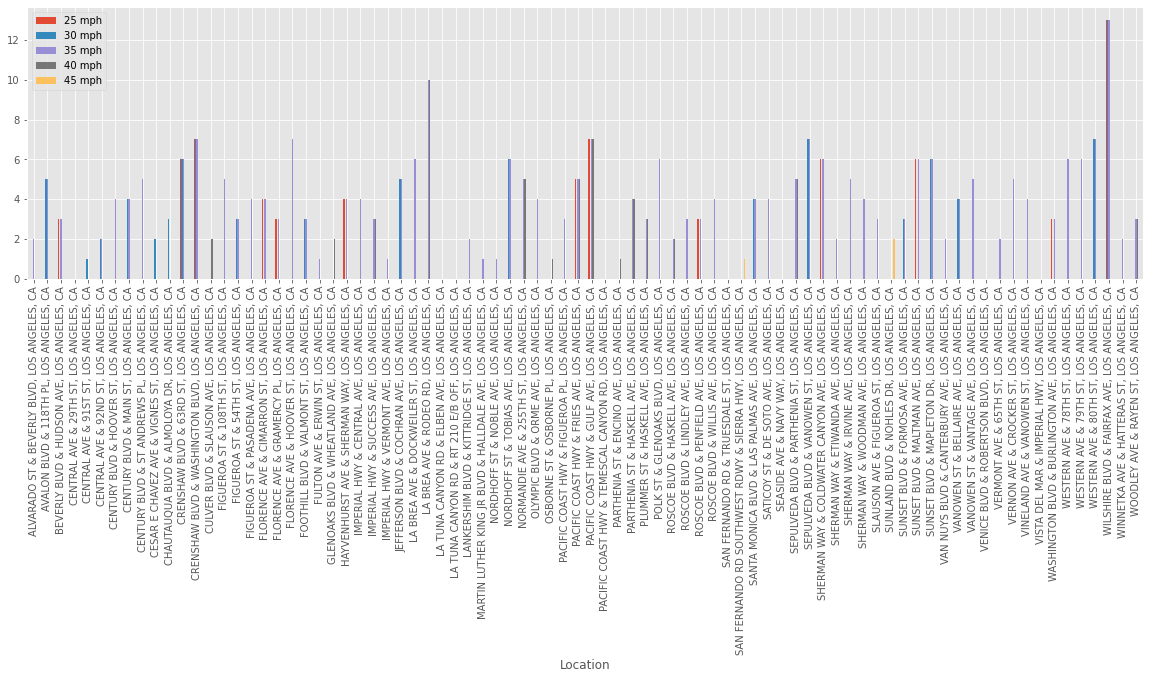

In [122]:
#plotting a chart
join_speed.plot.bar(figsize=(20,5),
                               x='Location')

In [163]:
#going to try to get a better chart 
#value counts of seach speed limit
join_speed.sum()

Location    ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CAAVA...
25 mph                                                     70
30 mph                                                     91
35 mph                                                    277
40 mph                                                     53
45 mph                                                      3
dtype: object

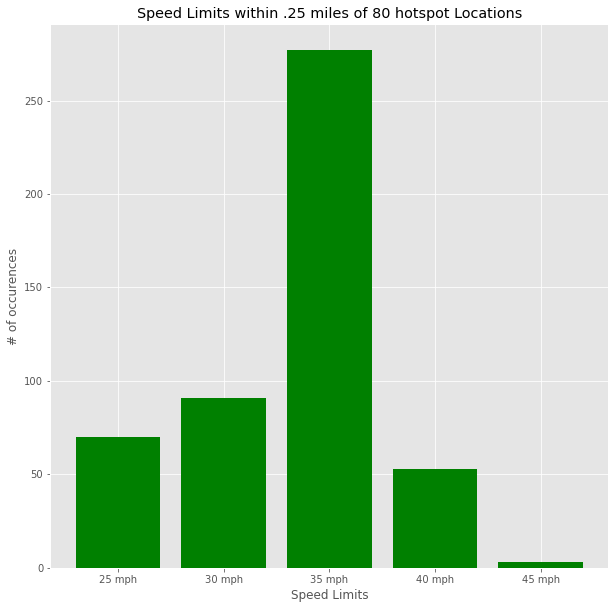

In [164]:
#better chart 
%matplotlib inline
plt.style.use('ggplot')
x = ['25 mph', '30 mph','35 mph', '40 mph', '45 mph']
Speed = [70, 91, 277, 53, 3]

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(10, 10))
plt.bar(x_pos, Speed, color='green')
plt.xlabel("Speed Limits")
plt.ylabel("# of occurences")
plt.title("Speed Limits within .25 miles of 80 hotspot Locations")

plt.xticks(x_pos, x)

plt.show()

In [ ]:
#Step 8: now lets see how I can map this...not really sure what the best way to visualize this is. 
#I think maybe the best way would be an interactive map where you could hover over each point and it would tell you the speed limits that were in the buffer

In [167]:
# use Plotly for interactive (https://plotly.com/python/plotly-express/)

In [166]:
#Step 9
#write to file 
gdf_buffer.to_file("speeds_location_buffer.geojson", driver='GeoJSON')